In [9]:
%matplotlib inline
import glob, os,sys,timeit
import matplotlib
import matplotlib.backends.backend_pdf 
import numpy as np
from PyQSOFit import QSOFit
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
###############
path='/home/jin/type1agn/'


################################

newdata = np.rec.array([(6564.61,'Ha',6400.,6800.,'Ha_br',1,6e-3,0.004,0.05,0.015,0,0,0,0.05),\
                        (6564.61,'Ha',6400.,6800.,'Ha_na',1,4e-4,1e-4,0.0017,0.01,1,1,0,0.002),\
                        #(6549.85,'Ha',6400.,6800.,'NII6549',1,4e-4,2.3e-4,0.0017,5e-3,0,3,1,0.001),\
                        #(6585.28,'Ha',6400.,6800.,'NII6585',1,4e-4,2.3e-4,0.0017,5e-3,0,3,1,0.003),\
                        #(6718.29,'Ha',6400.,6800.,'SII6718',1,4e-4,2.3e-4,0.0017,5e-3,0,2,2,0.001),\
                        #(6732.67,'Ha',6400.,6800.,'SII6732',1,4e-4,2.3e-4,0.0017,5e-3,0,2,2,0.001),\
                        
                        (4862.68,'Hb',4640.,5100.,'Hb_br',1,5e-3,0.004,0.05,0.01,0,0,0,0.01),\
                        (4862.68,'Hb',4640.,5100.,'Hb_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        #(4960.30,'Hb',4640.,5100.,'OIII4959c',1,1e-3,2.3e-4,0.0017,0.01,1,1,1,0.002),\
                        #(5008.24,'Hb',4640.,5100.,'OIII5007c',1,1e-3,2.3e-4,0.0017,0.01,1,1,1,0.006),\
                        #(4960.30,'Hb',4640.,5100.,'OIII4959w',1,3e-3,2.3e-4,0.004,0.01,1,1,2,0.001),\
                        #(5008.24,'Hb',4640.,5100.,'OIII5007w',1,3e-3,2.3e-4,0.004,0.01,1,1,2,0.002),\
                        #(4687.02,'Hb',4640.,5100.,'HeII4687_br',1,5e-3,0.004,0.05,0.005,0,0,0,0.001),\
                        #(4687.02,'Hb',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.0017,0.005,1,1,0,0.001),\
                        
                        #(3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.0017,0.01,99,0,0,-0.001),\
                        
                        #(3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.0017,0.01,1,1,0,0.001),\
                        
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.0017,0.01,0,0,0,0.001),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001),\
                        
                        #(2798.75,'MgII',2700.,2900.,'MgII_br',1,5e-3,0.004,0.05,0.015,0,0,0,0.05),\
                        #(2798.75,'MgII',2700.,2900.,'MgII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        
                        #(1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.004,0.05,0.015,99,0,0,0.01),\
                        #(1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        #(1549.06,'CIV',1500.,1700.,'CIV_br',1,5e-3,0.004,0.05,0.015,0,0,0,0.05),\
                        #(1549.06,'CIV',1500.,1700.,'CIV_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        
                        #(1402.06,'SiIV',1290.,1450.,'SiIV_OIV1',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1396.76,'SiIV',1290.,1450.,'SiIV_OIV2',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1335.30,'SiIV',1290.,1450.,'CII1335',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1304.35,'SiIV',1290.,1450.,'OI1304',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        #(1215.67,'Lya',1150.,1290.,'Lya_br',1,5e-3,0.004,0.05,0.02,0,0,0,0.05),\
                        #(1215.67,'Lya',1150.,1290.,'Lya_na',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002)\
                        ],\
                     formats='float32,a20,float32,float32,a20,float32,float32,float32,float32,\
                     float32,float32,float32,float32,float32',\
                     names='lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue')
#------header-----------------
hdr = fits.Header()
hdr['lambda'] = 'Vacuum Wavelength in Ang'
hdr['minwav'] = 'Lower complex fitting wavelength range'
hdr['maxwav'] = 'Upper complex fitting wavelength range'
hdr['ngauss'] = 'Number of Gaussians for the line'
hdr['inisig'] = 'Initial guess of linesigma [in lnlambda]'
hdr['minsig'] = 'Lower range of line sigma [lnlambda]'  
hdr['maxsig'] = 'Upper range of line sigma [lnlambda]'
hdr['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr['fvalue'] = 'Relative scale factor for entries w/ same findex'
#------save line info-----------
hdu = fits.BinTableHDU(data=newdata,header=hdr,name='data')
hdu.writeto(path+'qsopar.fits',overwrite=True)


In [14]:

path1=path #'/Users/legolason/study/mesfit/'                  # the path of the source code file and qsopar.fits
path2=path #'/Users/legolason/study/mesfit/test/data/result/' # path of fitting results
path3=path #'/Users/legolason/study/mesfit/test/data/QA_l/'   # path of figure 
path4=path+'dustmap/' #'/Users/legolason/study/sed/dustmap/'             # path of dusp reddening map

#Requried
# an important note that all the data input must be finite, especically for the error !!!
data=fits.open('./spec-2974-54592-0337.fits') 
lam=10**data[1].data['loglam']        # OBS wavelength [A]
flux=data[1].data['flux']             # OBS flux [erg/s/cm^2/A]
err=1./np.sqrt(data[1].data['ivar'])  # 1 sigma error
z=data[2].data['z'][0]                # Redshift

#Optinal
ra=data[0].header['plug_ra']          # RA 
dec=data[0].header['plug_dec']        # DEC
plateid = data[0].header['plateid']   # SDSS plate ID
mjd = data[0].header['mjd']           # SDSS MJD
fiberid = data[0].header['fiberid']   # SDSS fiber ID


Fitting finished in :1.0s


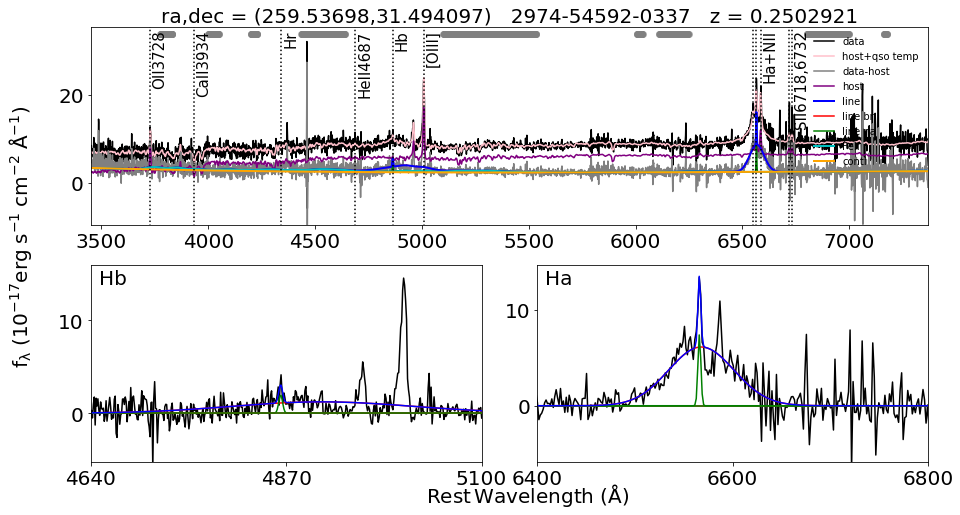

In [15]:
# get data prepared 
q = QSOFit(lam, flux, err, z, ra = ra, dec = dec, plateid = plateid, mjd = mjd, fiberid = fiberid, path = path1)

start = timeit.default_timer()
# do the fitting
q.Fit(name = None,nsmooth = 1, and_or_mask = False, deredden = True, reject_badpix = False, wave_range = None,\
      wave_mask =None, decomposition_host = True, Mi = None, npca_gal = 10, npca_qso = 20, \
      Fe_uv_op = True, poly = True, BC = False, rej_abs = False, initial_guess = None, MC = False, \
      n_trails = 5, linefit = True, tie_lambda = True, tie_width = True, tie_flux_1 = True, tie_flux_2 = True,\
      save_result = True, plot_fig = True,save_fig = True, plot_line_name = True, plot_legend = True, \
      dustmap_path = path4, save_fig_path = path3, save_fits_path = path2,save_fits_name = 'result')

end = timeit.default_timer()
print ('Fitting finished in :'+str(np.round(end-start))+'s')
# grey shade on the top is the continuum windiows used to fit.